## tableQA

This is a tool for querying natural language on tabular data like csvs,excel sheet,etc. The QA system converts natural language to SQL queries and feeds the dataframe to a database,upon which the generated SQL query is applied to obtain results.

Some of the features of tableQA are:

- Supports detection from multiple csvs
- Support FuzzyString implementation. i.e, incomplete csv values in query can be automatically detected and filled in the query.
- Open-Domain, No training required.
- Add manual schema for customized experience
- Auto-generate schemas in case schema not provided

Built with the help of QA models of [huggingface transformers](https://huggingface.co/transformers/examples.html) .

In [ ]:
! pip install tableqa

In [ ]:
! git clone https://github.com/abhijithneilabraham/tableQA/
%cd tableQA/tableqa/

In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_data/Cancer Death - Data.csv")
# A first look at data
df.head()

,Unnamed: 0,Year,Nationality,Gender,Cancer site,Death Count,age
0,0,2011,Expatriate,Female,Other Cancer,2,10
1,1,2011,Expatriate,Female,"Kidney, renal pelvis and ureter",1,10
2,2,2011,Expatriate,Female,Breast,1,20
3,3,2011,Expatriate,Female,Stomach,1,30
4,4,2011,Expatriate,Female,Leukaemia,2,30


- You can see the file we are trying to query is a CSV file with columns like Year, Nationality, Gender, Cancer Site, Death Count, age. Let's try to answer some questions from this dataset.

Make sure you are giving the absolute path of the directory containing the csv files.

In [ ]:
from tableqa.agent import Agent

agent = Agent(df)

Let's try answering a important question from this dataset like:

**how many deaths of age below 40 had breast cancer?**


In [ ]:
agent.query_db("how many deaths of age below 40 had stomach cancer?")

[(24,)]

- You can see that **24 people** below age 40 died with stomach cancer

You can see the associated SQL query with this result. If you want to get just the associated SQL query use `get_query` function

In [ ]:
agent.get_query("how many deaths of age below 40 had stomach cancer?")

'SELECT COUNT(death_count) FROM dataframe WHERE age  < 40 AND cancer_site = "Stomach" '

- You can also visualise the output as a chart ,by passing the type of chart you want to display.

[('Other Cancer',),
 ('Leukaemia',),
 ('Other Cancer',),
 ('Brain, nervous system',),
 ('Leukaemia',),
 ('Leukaemia',),
 ('Other Cancer',),
 ('Leukaemia',),
 ('Cervix uteri',),
 ('Other pharynx',),
 ('Other Cancer',),
 ('Stomach',),
 ('Colorectum',),
 ('Breast',),
 ('Stomach',),
 ('Ovary',),
 ('Kidney, renal pelvis and ureter',),
 ('Gallbladder and extrahepatic ducts',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Stomach',),
 ('Ovary',),
 ('Melanoma of skin',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Pancreas',),
 ('Lip, oral cavity',),
 ('Leukaemia',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Pancreas',),
 ('Other Cancer',),
 ('Lymphoma',),
 ('Liver and intrahepatic bile ducts',),
 ('Leukaemia',),
 ('Colorectum',),
 ('Cervix uteri',),
 ('Breast',),
 ('Trachea, bronchus and lung',),
 ('Stomach',),
 ('Ovary',),
 ('Other Cancer',),
 ('Non-melanoma skin cancer',),
 ('Lymphoma',),
 ('Liver and intrahepatic bile ducts',)

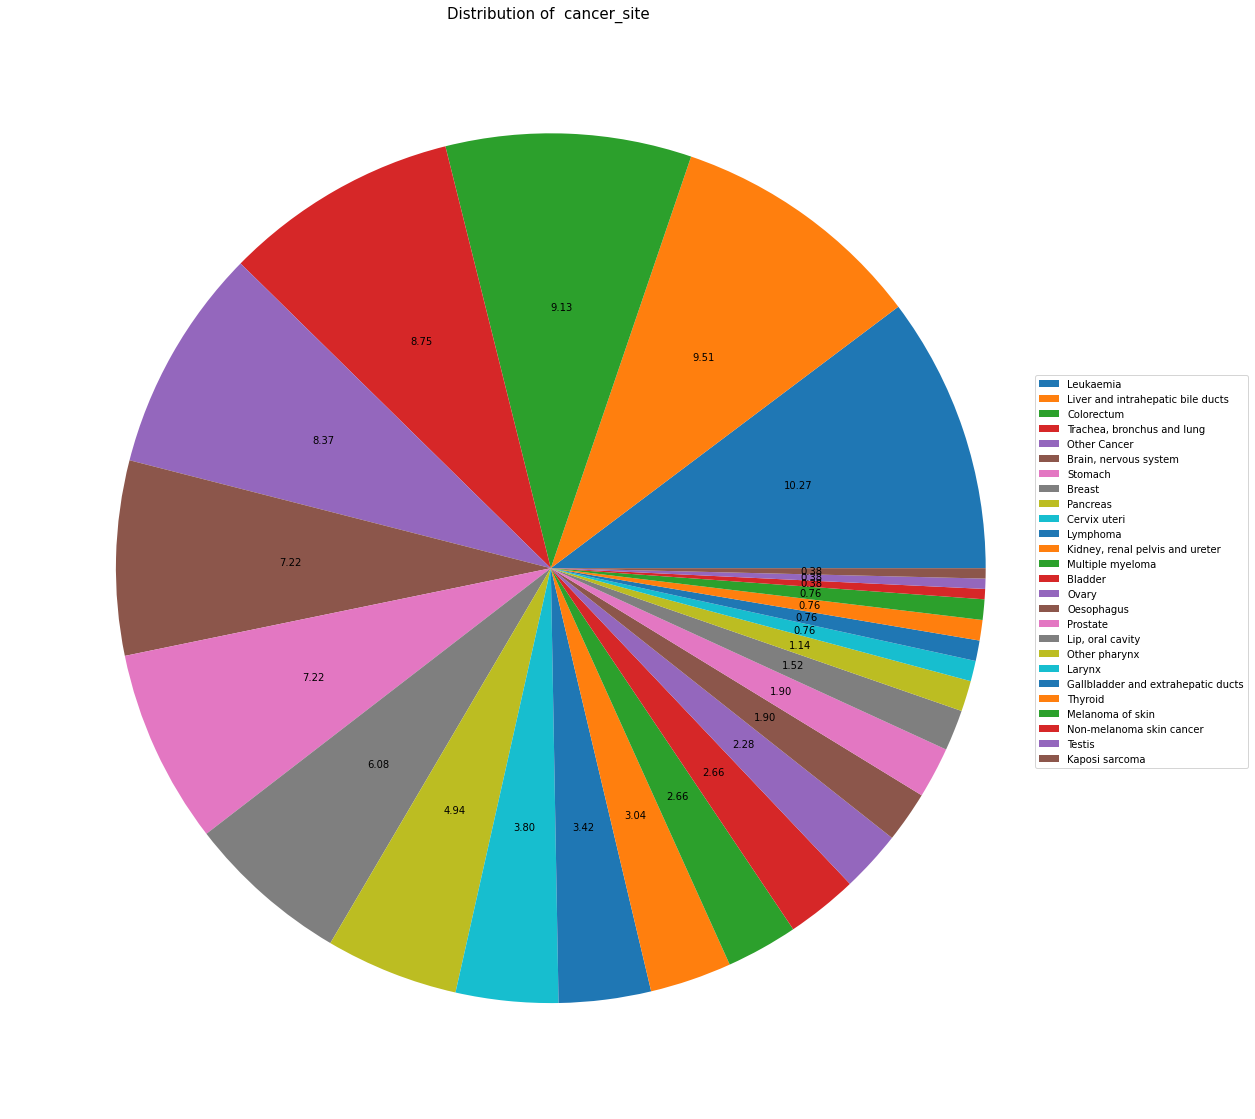

In [ ]:
agent.query_db("What are the types of cancers found in people in 2013?", chart ='pie', size=(20,20))

- Let's try another question:

`Get me the average death count per year of stomach cancer deaths?`

In [ ]:
agent.query_db("Get me the average death count per year of stomach cancer deaths?")

[(1.2877697841726619,)]

Using a manual schema can improve the perfomance, i.e , you can give keywords related to the csv names or column names, which allows the user to have more control over the output. A schema format can be seen below:

In [ ]:
Schema Format:
{
    "name": DATABASE NAME,
    "keywords":[DATABASE KEYWORDS],
    "columns":
    [
        {
        "name": COLUMN 1 NAME,
        "mapping":{
            CATEGORY 1: [CATEGORY 1 KEYWORDS],
            CATEGORY 2: [CATEGORY 2 KEYWORDS]
        }

        },
        {
        "name": COLUMN 2 NAME,
        "keywords": [COLUMN 2 KEYWORDS]
        },
        {
        "name": "COLUMN 3 NAME",
        "keywords": [COLUMN 3 KEYWORDS],
        "summable":"True"
        }
    ]
}


-"Mappings" are for those columns whose values have only few distinct classes.i.e, Gender in the above cancer death data have only two distinct classes, Male and Female.

-Include only the column names which need to have manual "keywords" or "mappings".Rest will will be autogenerated.

-"summable" is included for Numeric Type columns whose values are already count representations. Eg. Death Count,Cases etc. consists values which already represent a count.

You can see the schema of cancer death data below.

In [ ]:
import json
file=open('schema/Cancer Death - Data.json')
schema_file=json.load(file)
print(schema_file)

{'name': 'Cancer Death', 'columns': [{'name': 'Nationality', 'mapping': {'National': ['national', 'nationals', 'citizen', 'citizens', 'emarati', 'emaratis'], 'Expatriate': ['expatriate', 'foreigner', 'foreigners', 'immigrant', 'immgrants', 'foreign']}}, {'name': 'Gender', 'mapping': {'Male': ['male', 'males', 'man', 'men', 'boys'], 'Female': ['female', 'females', 'woman', 'women', 'girls']}}, {'name': 'Cancer site', 'keywords': ['type of cancer', 'cancer location']}, {'name': 'Death Count', 'keywords': ['died', 'death', 'dead'], 'summable': 'True'}]}


Using a schema:

In [ ]:
agent = Agent(df,schema_file)

In [ ]:
agent.query_db("how many deaths of age below 40 had stomach cancer?")

[(24,)]

You can also input multiple csvs and schemas and detect the corresponding csv,by giving the absolute path to the directories of  csvs and their respective schemas as shown below. Using a schema is optional.

In [ ]:
csv_path="/content/tableQA/tableqa/cleaned_data"
schema_path="/content/tableQA/tableqa/schema"

agent=Agent(csv_path,schema_path)


If you liked this project, feel free to give a ⭐ in the [github repository](https://github.com/abhijithneilabraham/tableQA). Learn about more of it's features in the [README](https://github.com/abhijithneilabraham/tableQA/blob/master/README.md).